In [27]:
import numpy as np


In [28]:
import pandas as pd


In [29]:
np.random.seed(42)

In [30]:
employee_ids = [f"EMP_{i:03d}" for i in range(1,31)]

In [31]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [32]:
employee_ids


['EMP_001',
 'EMP_002',
 'EMP_003',
 'EMP_004',
 'EMP_005',
 'EMP_006',
 'EMP_007',
 'EMP_008',
 'EMP_009',
 'EMP_010',
 'EMP_011',
 'EMP_012',
 'EMP_013',
 'EMP_014',
 'EMP_015',
 'EMP_016',
 'EMP_017',
 'EMP_018',
 'EMP_019',
 'EMP_020',
 'EMP_021',
 'EMP_022',
 'EMP_023',
 'EMP_024',
 'EMP_025',
 'EMP_026',
 'EMP_027',
 'EMP_028',
 'EMP_029',
 'EMP_030']

In [33]:
data = {
    "Date": np.tile(dates,len(employee_ids)),
    "Employee_ID":np.repeat(employee_ids,len(dates)),
    "Working_Hours":np.random.uniform(4,10,size=len(dates)*len(employee_ids)).round(2)
}

In [34]:
df=pd.DataFrame(data)

In [35]:
df.to_csv("employee_working_hours.csv",index=False)

In [36]:
df_csv=pd.read_csv("employee_working_hours.csv")

In [37]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

         Date Employee_ID  Working_Hours
0  2025-07-01     EMP_001           6.25
1  2025-07-02     EMP_001           9.70
2  2025-07-03     EMP_001           8.39
3  2025-07-04     EMP_001           7.59
4  2025-07-05     EMP_001           4.94
       Working_Hours
count     900.000000
mean        6.954233
std         1.762088
min         4.030000
25%         5.387500
50%         7.010000
75%         8.490000
max        10.000000
30


In [39]:
total_hours=df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)

In [50]:
avg_daily = df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [51]:
threshold_low=5
threshold_high=9
df_csv["Low_Hours_Flag"]=df_csv["Working_Hours"] < threshold_low
df_csv["High_Hours_Flag"]=df_csv["Working_Hours"] > threshold_high
print(df_csv[df_csv["Low_Hours_Flag"] | df_csv["High_Hours_Flag"]].head())

         Date Employee_ID  Working_Hours  Low_Hour_flag  High_Hour_flag  \
1  2025-07-02     EMP_001           9.70          False            True   
4  2025-07-05     EMP_001           4.94           True           False   
5  2025-07-06     EMP_001           4.94           True           False   
6  2025-07-07     EMP_001           4.35           True           False   
7  2025-07-08     EMP_001           9.20          False            True   

   Low_Hours_flag  High_Hours_flag  Low_Hours_Flag  High_Hours_Flag  
1           False             True           False             True  
4            True            False            True            False  
5            True            False            True            False  
6            True            False            True            False  
7           False             True           False             True  


In [52]:
df_csv.drop(columns=["Low_Hours_flag", "High_Hour_flag"], errors="ignore", inplace=True)

In [53]:
threshold_low = 5
threshold_high = 9

df_csv["Low_Hours_Flag"] = df_csv["Working_Hours"] < threshold_low
df_csv["High_Hours_Flag"] = df_csv["Working_Hours"] > threshold_high

print(df_csv[df_csv["Low_Hours_Flag"] | df_csv["High_Hours_Flag"]].head())


         Date Employee_ID  Working_Hours  Low_Hour_flag  High_Hours_flag  \
1  2025-07-02     EMP_001           9.70          False             True   
4  2025-07-05     EMP_001           4.94           True            False   
5  2025-07-06     EMP_001           4.94           True            False   
6  2025-07-07     EMP_001           4.35           True            False   
7  2025-07-08     EMP_001           9.20          False             True   

   Low_Hours_Flag  High_Hours_Flag  
1           False             True  
4            True            False  
5            True            False  
6            True            False  
7           False             True  


In [54]:
df_csv.drop(columns=["Low_Hours_flag", "High_Hours_flag"], errors="ignore", inplace=True)

In [55]:
threshold_low = 5
threshold_high = 9

df_csv["Low_Hours_Flag"] = df_csv["Working_Hours"] < threshold_low
df_csv["High_Hours_Flag"] = df_csv["Working_Hours"] > threshold_high

print(df_csv[df_csv["Low_Hours_Flag"] | df_csv["High_Hours_Flag"]].head())

         Date Employee_ID  Working_Hours  Low_Hour_flag  Low_Hours_Flag  \
1  2025-07-02     EMP_001           9.70          False           False   
4  2025-07-05     EMP_001           4.94           True            True   
5  2025-07-06     EMP_001           4.94           True            True   
6  2025-07-07     EMP_001           4.35           True            True   
7  2025-07-08     EMP_001           9.20          False           False   

   High_Hours_Flag  
1             True  
4            False  
5            False  
6            False  
7             True  


In [56]:
df_csv.drop(columns=["Low_Hour_flag"], errors="ignore", inplace=True)

In [57]:
threshold_low = 5
threshold_high = 9

df_csv["Low_Hours_Flag"] = df_csv["Working_Hours"] < threshold_low
df_csv["High_Hours_Flag"] = df_csv["Working_Hours"] > threshold_high

print(df_csv[df_csv["Low_Hours_Flag"] | df_csv["High_Hours_Flag"]].head())

         Date Employee_ID  Working_Hours  Low_Hours_Flag  High_Hours_Flag
1  2025-07-02     EMP_001           9.70           False             True
4  2025-07-05     EMP_001           4.94            True            False
5  2025-07-06     EMP_001           4.94            True            False
6  2025-07-07     EMP_001           4.35            True            False
7  2025-07-08     EMP_001           9.20           False             True


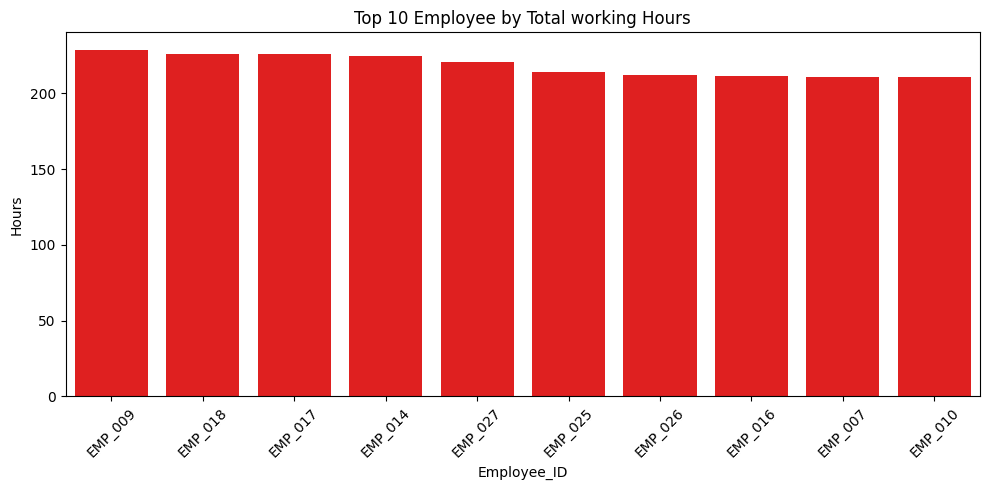

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
top10 = total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index,y=top10.values,color='red')
plt.xticks(rotation=45)
plt.title("Top 10 Employee by Total working Hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()